In [1]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('../input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


../input/insurance.csv


In [2]:
insurance = pd.read_csv("../input/insurance.csv")
insurance.shape

(1338, 7)

In [3]:
insurance.ndim

2

In [4]:
#Summary Statistics
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
correlation = insurance.corr(method = 'pearson')

In [6]:
correlation

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [7]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

In [8]:
X = np.asarray(insurance)

In [9]:
X

array([[19, 'female', 27.9, ..., 'yes', 'southwest', 16884.924],
       [18, 'male', 33.77, ..., 'no', 'southeast', 1725.5523],
       [28, 'male', 33.0, ..., 'no', 'southeast', 4449.462],
       ...,
       [18, 'female', 36.85, ..., 'no', 'southeast', 1629.8335],
       [21, 'female', 25.8, ..., 'no', 'southwest', 2007.945],
       [61, 'female', 29.07, ..., 'yes', 'northwest', 29141.3603]],
      dtype=object)

In [10]:

variable_labels = np.asarray(insurance.columns)[0:]

In [11]:
var = variable_labels[0:6]

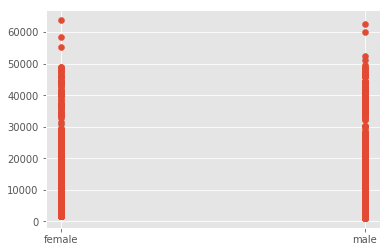

In [12]:
plt.scatter(insurance["sex"],insurance["charges"])

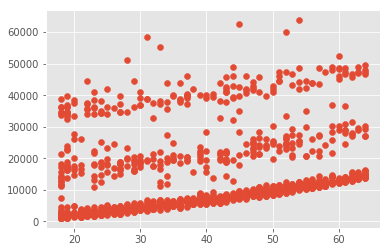

In [13]:
plt.scatter(insurance["age"],insurance["charges"])

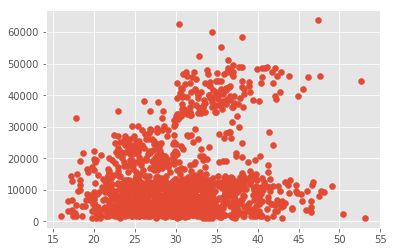

In [14]:
plt.scatter(insurance["bmi"],insurance["charges"])

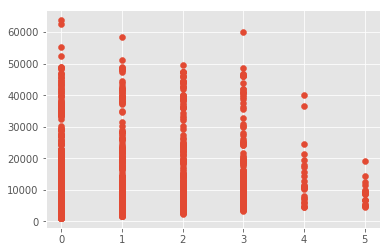

In [15]:
plt.scatter(insurance["children"],insurance["charges"])

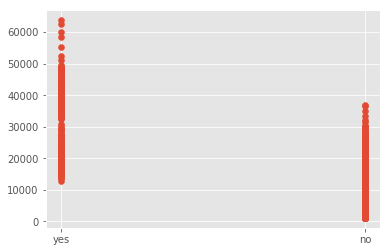

In [16]:
plt.scatter(insurance["smoker"],insurance["charges"])

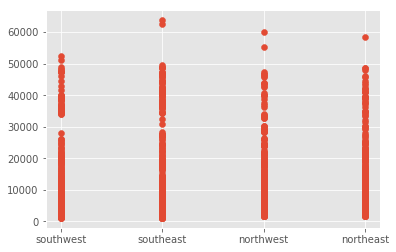

In [17]:
plt.scatter(insurance["region"],insurance["charges"])

In [18]:
#Since this a clean dataset going for datamodelling with LinearRegression
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [19]:
#Replace Categoricaldata with dummy variable
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
encoder.fit(insurance['sex'].drop_duplicates())
insurance['sex']=encoder.transform(insurance['sex'])
encoder.fit(insurance['smoker'].drop_duplicates())
insurance['smoker']=encoder.transform(insurance['smoker'])
encoder.fit(insurance['region'].drop_duplicates())
insurance['region']=encoder.transform(insurance['region'])
insurance.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
5,31,0,25.740,0,0,2,3756.62160
6,46,0,33.440,1,0,2,8240.58960
7,37,0,27.740,3,0,1,7281.50560
8,37,1,29.830,2,0,0,6406.41070
9,60,0,25.840,0,0,1,28923.13692


In [20]:

X = insurance[['age','sex','bmi','children','smoker','region']]
y = insurance['charges']
X_train = X[:-30]
X_test  = X[-30:]
y_train = y[:-30]
y_test  = y[-30:]

In [21]:
lm = LinearRegression()
model = lm.fit(X_train,y_train)

In [22]:
model.coef_

array([  261.74515668,   -59.26372555,   337.35835628,   458.62206695,
       23834.98016863,  -350.3985942 ])

In [23]:
y_pred = model.predict(X_test)

In [24]:
model.score(X_test,y_test)

0.6828030501753575

In [25]:
model.intercept_

-12156.208394950478

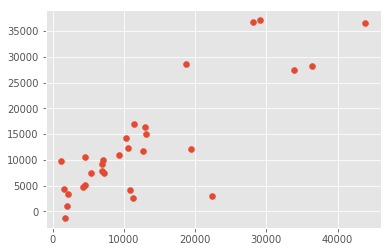

In [26]:
plt.scatter(y_test,y_pred)

In [27]:
#LinearRegression RMSE outcome
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 4725.159098738848
MSE: 38925145.58411788
RMSE: 6239.001970196666


In [28]:
#GBM to improve RMSE and increase feature importance
from sklearn.ensemble import GradientBoostingRegressor
gbm=GradientBoostingRegressor(n_estimators=100)
gbm.fit(X_train,y_train)
y_pred_gbm = gbm.predict(X_test)
error_gbm = metrics.mean_squared_error(y_test,y_pred_gbm)
print(np.sqrt(error_gbm))

4083.6250697925398


In [29]:
gbm.feature_importances_

array([1.17425904e-01, 2.97904331e-04, 1.83548350e-01, 8.55021388e-03,
       6.86805910e-01, 3.37171839e-03])

Text(0, 0.5, 'Feature Importance Score')

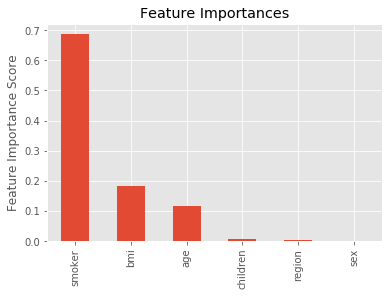

In [30]:
 feat_imp = pd.Series(gbm.feature_importances_,var).sort_values(ascending=False)
 feat_imp.plot(kind='bar', title='Feature Importances')
 plt.ylabel('Feature Importance Score')